# First benchmark: No balancing

In [0]:
feature_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
X = creditdata[feature_cols]
y = creditdata.SeriousDlqin2yrs

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [0]:
model = Sequential()

model.add(Dense(10, kernel_regularizer=l2(0.01), activation='relu', input_dim = 10))
model.add(Dense(16, kernel_regularizer=l2(0.01), activation='relu'))
model.add(Dense(8, kernel_regularizer=l2(0.01), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=Adam(lr = 0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(x = X_train, y = y_train,
          validation_data=[X_test, y_test],
          epochs = 4,
          batch_size=20)

Train on 72161 samples, validate on 48108 samples
Epoch 1/4
72161/72161 [==============================] - 10s 144us/step - loss: 0.5832 - acc: 0.8931 - val_loss: 0.3635 - val_acc: 0.9304
Epoch 2/4
72161/72161 [==============================] - 8s 106us/step - loss: 0.3176 - acc: 0.9306 - val_loss: 0.2905 - val_acc: 0.9306
Epoch 3/4
72161/72161 [==============================] - 8s 113us/step - loss: 0.2770 - acc: 0.9307 - val_loss: 0.2673 - val_acc: 0.9304
Epoch 4/4
72161/72161 [==============================] - 11s 151us/step - loss: 0.2613 - acc: 0.9306 - val_loss: 0.2574 - val_acc: 0.9304


In [0]:
nn_pred = model.predict(X_test)
print('AUC: ', metrics.roc_auc_score(y_test, nn_pred))

AUC:  0.7502266110524116


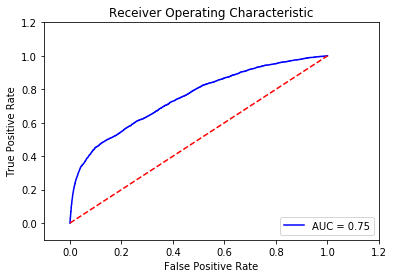

In [0]:
actual = y_test
predictions = model.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Second benchmark: SMOTE

In [0]:
np.bincount(y)

array([111912,   8357], dtype=int64)

In [0]:
X_smote, y_smote = SMOTE(random_state=12, ratio = 1.0).fit_sample(X, y)

In [0]:
np.bincount(y_smote)

array([111912, 111912], dtype=int64)

In [0]:
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)

In [0]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_smote, y_smote, test_size = 0.4, random_state = 0)

In [0]:
model.fit(x = X_train1, y = y_train1,
          validation_data=[X_test, y_test],
          epochs = 4,
          batch_size=20)

Train on 134294 samples, validate on 48108 samples
Epoch 1/4
134294/134294 [==============================] - 29s 214us/step - loss: 0.6579 - acc: 0.6790 - val_loss: 0.5879 - val_acc: 0.7925
Epoch 2/4
134294/134294 [==============================] - 25s 183us/step - loss: 0.6101 - acc: 0.7227 - val_loss: 0.5764 - val_acc: 0.8252
Epoch 3/4
134294/134294 [==============================] - 20s 150us/step - loss: 0.6008 - acc: 0.7286 - val_loss: 0.5711 - val_acc: 0.8379
Epoch 4/4
134294/134294 [==============================] - 23s 172us/step - loss: 0.5959 - acc: 0.7304 - val_loss: 0.5804 - val_acc: 0.8185


In [0]:
nn_pred = model.predict(X_test1)
print('AUC: ', metrics.roc_auc_score(y_test1, nn_pred))

AUC:  0.8048810733863294


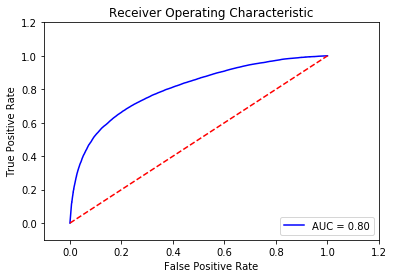

In [0]:
actual = y_test1
predictions = model.predict(X_test1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()